# CHM13 vs HG38 Reference Genome Non-B Whole Annotation Comparison

0       IR
1       DR
2       MR
3      APR
4        Z
5       GQ
6    Total
Name: Motif Type, dtype: object


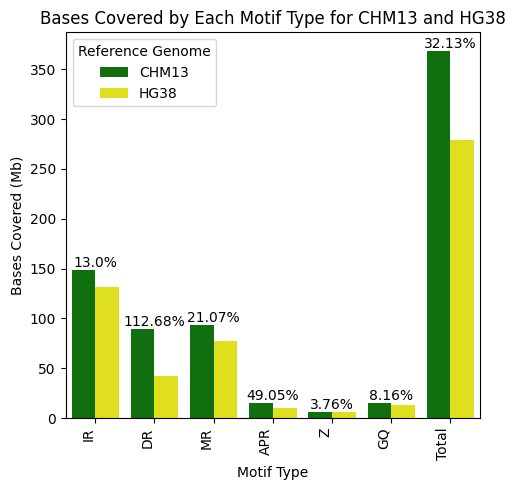

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file, ensuring numeric columns are read as strings initially
file_path = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/collapsed_annotation_info.csv'  # Change to the actual file path
df = pd.read_csv(file_path, dtype={'CHM13 Bases Covered': str, 'HG38 Bases Covered': str, '% Increase (bases)': str})

# Convert columns to numeric, removing commas
df['CHM13 Bases Covered'] = df['CHM13 Bases Covered'].str.replace(',', '').astype(int)
df['HG38 Bases Covered'] = df['HG38 Bases Covered'].str.replace(',', '').astype(int)

# Convert bases to megabases
df['CHM13 Bases Covered (Mb)'] = df['CHM13 Bases Covered'] / 1e6
df['HG38 Bases Covered (Mb)'] = df['HG38 Bases Covered'] / 1e6

# Abbreviations for the Motif Type
abbreviation_map = {
    'Inverted_Repeat (nBMST)': 'IR',
    'Direct_Repeat (nBMST)': 'DR',
    'Mirror_Repeat (nBMST)': 'MR',
    'A_Phased_Repeat (nBMST)': 'APR',
    'Z_DNA_Motif (nBMST)': 'Z',
    'G_Quadruplex_Motif (Quadron)': 'GQ'
}

# Apply the abbreviation mapping
df['Motif Type'] = df['Motif Type'].replace(abbreviation_map)
print(df['Motif Type'])

# Reshape the DataFrame to long format for plotting
df_long = pd.melt(df, id_vars=['Motif Type'], value_vars=['CHM13 Bases Covered (Mb)', 'HG38 Bases Covered (Mb)'],
                  var_name='Reference Genome', value_name='Bases Covered (Mb)')

# Rename the 'Reference Genome' values for clarity
df_long['Reference Genome'] = df_long['Reference Genome'].replace({
    'CHM13 Bases Covered (Mb)': 'CHM13',
    'HG38 Bases Covered (Mb)': 'HG38'
})

# Plotting
plt.figure(figsize=(5, 5))
barplot = sns.barplot(data=df_long, x='Motif Type', y='Bases Covered (Mb)', hue='Reference Genome', palette=['green', 'yellow'])
plt.xticks(rotation=90, ha='right')
plt.title('Bases Covered by Each Motif Type for CHM13 and HG38')
plt.ylabel('Bases Covered (Mb)')
plt.xlabel('Motif Type')
plt.legend(title='Reference Genome')
plt.tight_layout()

# Annotate the bars with % increase
for i, row in df.iterrows():
    # Find the position of the CHM13 bar
    chm13_bar = df_long[(df_long['Motif Type'] == row['Motif Type']) & (df_long['Reference Genome'] == 'CHM13')]
    chm13_x = chm13_bar.index[0]
    chm13_y = row['CHM13 Bases Covered'] / 1e6  # Convert to megabases

    # Find the position of the HG38 bar
    hg38_bar = df_long[(df_long['Motif Type'] == row['Motif Type']) & (df_long['Reference Genome'] == 'HG38')]
    hg38_x = hg38_bar.index[0]
    hg38_y = row['HG38 Bases Covered'] / 1e6  # Convert to megabases

    # Annotate above the bars
    barplot.text(chm13_x, chm13_y, f"{row['% Increase (bases)']}", color='black', ha="center", va="bottom")
    
# Save the plot as a high-resolution image (300 dpi)
plt.savefig('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/imgs/chm13_hg38_base_coverage.pdf', bbox_inches='tight')

# Show plot
plt.show()

<Figure size 600x600 with 0 Axes>

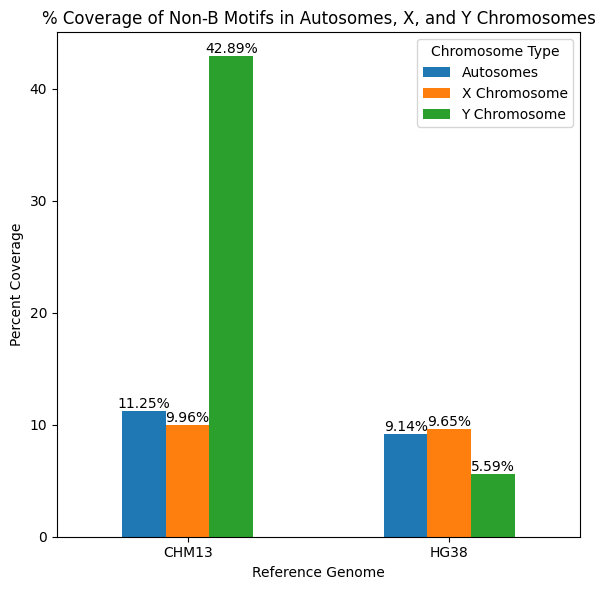

        Motif Type  Autosomes (%)  X Chromosome (%)  Y Chromosome (%)
0              APR       0.455563          0.382702          2.902946
1               DR       2.746089          1.484067         12.483360
2               IR       4.561082          4.627147         15.043402
3               MR       2.792564          2.883236         12.151067
4  Negative_G_Quad       0.243450          0.185183          0.103063
5  Positive_G_Quad       0.240299          0.187890          0.097422
6                Z       0.214572          0.205666          0.109601
        Motif Type  Autosomes (%)  X Chromosome (%)  Y Chromosome (%)
0              APR       0.339085          0.378940          0.240252
1               DR       1.367237          1.365869          1.317872
2               IR       4.288888          4.590893          2.050351
3               MR       2.489771          2.754209          1.685821
4  Negative_G_Quad       0.225418          0.180686          0.092215
5  Positive_G_Quad  

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Dictionaries for HG38 and CHM13 chromosome lengths
hg38_lengths = {
    'chr1': 248956422, 'chr2': 242193529, 'chr3': 198295559, 'chr4': 190214555, 'chr5': 181538259,
    'chr6': 170805979, 'chr7': 159345973, 'chr8': 145138636, 'chr9': 138394717, 'chr10': 133797422,
    'chr11': 135086622, 'chr12': 133275309, 'chr13': 114364328, 'chr14': 107043718, 'chr15': 101991189,
    'chr16': 90338345, 'chr17': 83257441, 'chr18': 80373285, 'chr19': 58617616, 'chr20': 64444167,
    'chr21': 46709983, 'chr22': 50818468, 'chrX': 156040895, 'chrY': 57227415
}

chm13_lengths = {
    'chr1': 248387328, 'chr2': 242696752, 'chr3': 201105948, 'chr4': 193574945, 'chr5': 182045439,
    'chr6': 172126628, 'chr7': 160567428, 'chr8': 146259331, 'chr9': 150617247, 'chr10': 134758134,
    'chr11': 135127769, 'chr12': 133324548, 'chr13': 113566686, 'chr14': 101161492, 'chr15': 99753195,
    'chr16': 96330374, 'chr17': 84276897, 'chr18': 80542538, 'chr19': 61707364, 'chr20': 66210255,
    'chr21': 45090682, 'chr22': 51324926, 'chrX': 154259566, 'chrY': 62460029
}

def calculate_percent_coverage_by_motif(quadron_csv, nbmst_csv, genome_lengths):
    """Calculate the percent coverage for each non-B motif type in autosomes, X, and Y."""
    
    # Read both CSVs
    df_quadron = pd.read_csv(quadron_csv)
    df_nbmst = pd.read_csv(nbmst_csv)
    
    # Split 'Sample_Haplotype_Chromosome' into just the chromosome part if necessary in nBMST
    if 'Sample_Haplotype_Chromosome' in df_nbmst.columns:
        df_nbmst['Chromosome'] = df_nbmst['Sample_Haplotype_Chromosome'].apply(lambda x: x.split('|')[0])
    
    # Combine the total bases covered from Quadron and nBMST by Chromosome and Motif Type
    df_quadron = df_quadron.groupby(['Chromosome', 'Motif Type'])['Total Bases Covered'].sum().reset_index()
    df_nbmst = df_nbmst.groupby(['Chromosome', 'Motif Type'])['Total Bases Covered'].sum().reset_index()

    # Merge the two dataframes on the 'Chromosome' and 'Motif Type' columns
    combined_df = pd.merge(df_quadron, df_nbmst, on=['Chromosome', 'Motif Type'], how='outer', suffixes=('_quadron', '_nbmst')).fillna(0)

    # Sum the total bases covered for each motif type from both sources
    combined_df['Total Bases Covered'] = combined_df['Total Bases Covered_quadron'] + combined_df['Total Bases Covered_nbmst']
    
    # Create a function to calculate percent coverage for each motif type
    def calculate_percent_by_category(df, genome_lengths):
        results = []
        for motif_type in df['Motif Type'].unique():
            motif_df = df[df['Motif Type'] == motif_type]

            # Filter for autosomes, chrX, and chrY
            autosomes = motif_df[motif_df['Chromosome'].isin([f'chr{i}' for i in range(1, 23)])]
            chrX = motif_df[motif_df['Chromosome'] == 'chrX']
            chrY = motif_df[motif_df['Chromosome'] == 'chrY']
            
            # Calculate total bases covered for each category
            autosomes_bases_covered = autosomes['Total Bases Covered'].sum()
            chrX_bases_covered = chrX['Total Bases Covered'].sum() if not chrX.empty else 0
            chrY_bases_covered = chrY['Total Bases Covered'].sum() if not chrY.empty else 0
            
            # Calculate the total length of autosomes, chrX, and chrY
            autosomes_length = sum([genome_lengths[f'chr{i}'] for i in range(1, 23)])
            chrX_length = genome_lengths['chrX']
            chrY_length = genome_lengths['chrY']
            
            # Calculate the percentage coverage for each
            autosomes_percent = (autosomes_bases_covered / autosomes_length) * 100
            chrX_percent = (chrX_bases_covered / chrX_length) * 100
            chrY_percent = (chrY_bases_covered / chrY_length) * 100
            
            # Append results to the list
            results.append({
                'Motif Type': motif_type,
                'Autosomes (%)': autosomes_percent,
                'X Chromosome (%)': chrX_percent,
                'Y Chromosome (%)': chrY_percent
            })
        return pd.DataFrame(results)
    
    # Calculate percentage coverage for each motif type
    coverage_df = calculate_percent_by_category(combined_df, genome_lengths)
    
    return coverage_df

# Paths to the CSV files generated earlier for both Quadron and nBMST for CHM13 and HG38
chm13_quadron_csv = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/chm13/chm13_quadron_collapsed_summary_metrics.csv'
chm13_nbmst_csv = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/chm13/chm13_collapsed_summary_metrics_chr.csv'

hg38_quadron_csv = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/hg38/hg38_quadron_collapsed_summary_metrics.csv'
hg38_nbmst_csv = '/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/results/summary_stats/hg38/hg38_collapsed_summary_metrics_chr.csv'

# Calculate percent coverage for CHM13 and HG38
chm13_coverage_df = calculate_percent_coverage_by_motif(chm13_quadron_csv, chm13_nbmst_csv, chm13_lengths)
hg38_coverage_df = calculate_percent_coverage_by_motif(hg38_quadron_csv, hg38_nbmst_csv, hg38_lengths)

# Combine the results for both genomes into one DataFrame for plotting
combined_coverage = {
    'Genome': ['CHM13', 'CHM13', 'CHM13', 'HG38', 'HG38', 'HG38'],
    'Chromosome': ['Autosomes', 'X Chromosome', 'Y Chromosome', 'Autosomes', 'X Chromosome', 'Y Chromosome'],
    'Percent Coverage': [
        chm13_coverage_df['Autosomes (%)'].sum(),
        chm13_coverage_df['X Chromosome (%)'].sum(),
        chm13_coverage_df['Y Chromosome (%)'].sum(),
        hg38_coverage_df['Autosomes (%)'].sum(),
        hg38_coverage_df['X Chromosome (%)'].sum(),
        hg38_coverage_df['Y Chromosome (%)'].sum()
    ]
}
coverage_data = pd.DataFrame(combined_coverage)

# Plotting the combined coverage for CHM13 and HG38
plt.figure(figsize=(6, 6))
ax = coverage_data.pivot(index='Genome', columns='Chromosome', values='Percent Coverage').plot(kind='bar', stacked=False, figsize=(6,6))

# Adding percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

plt.title("% Coverage of Non-B Motifs in Autosomes, X, and Y Chromosomes")
plt.ylabel("Percent Coverage")
plt.xlabel("Reference Genome")
plt.xticks(rotation=0)
plt.legend(title="Chromosome Type")
plt.tight_layout()

plt.savefig('/home/alextu/projects/def-sushant/verkko_batch123_nonB_annotations_aligned_july2024/imgs/chm13_hg38_xyautosomes_coverage.pdf', bbox_inches='tight')

plt.show()

print(chm13_coverage_df)
print(hg38_coverage_df)